In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
x = np.array([1, 2, 3, 4, 5], dtype=float).reshape(-1, 1)  # shape (5,1)
y = np.array([5, 7, 9, 11, 13], dtype=float).reshape(-1, 1) # shape (5,1)


(5,) (5,)


In [13]:
listOfOptimizers = [
    ("SGD", tf.keras.optimizers.SGD(learning_rate=0.01)),
    ("RMSprop", tf.keras.optimizers.RMSprop(learning_rate=0.01)),
    ("Adadelta", tf.keras.optimizers.Adadelta(learning_rate=1.0)),
    ("Adagrad", tf.keras.optimizers.Adagrad(learning_rate=0.01)),
    ("Adamax", tf.keras.optimizers.Adamax(learning_rate=0.01)),
]

def buildModel():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(1)  # regression output
    ])
    return model


In [14]:
histories = {}

for name, opt in listOfOptimizers:
    print(f"Training with {name}...")
    model = buildModel()
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(x, y, epochs=100, verbose=0)
    histories[name] = history.history['loss']


Training with SGD...
Training with RMSprop...
Training with Adadelta...
Training with Adagrad...
Training with Adamax...


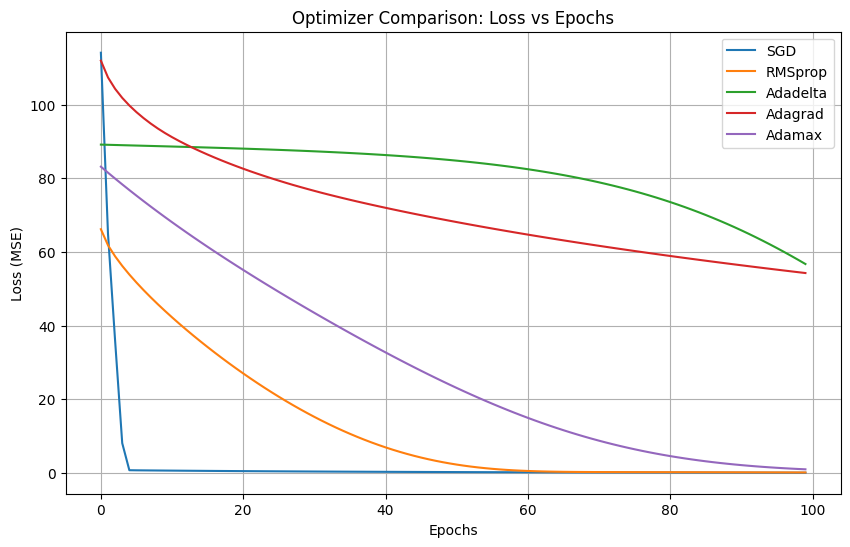

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for name, loss in histories.items():
    plt.plot(loss, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Optimizer Comparison: Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


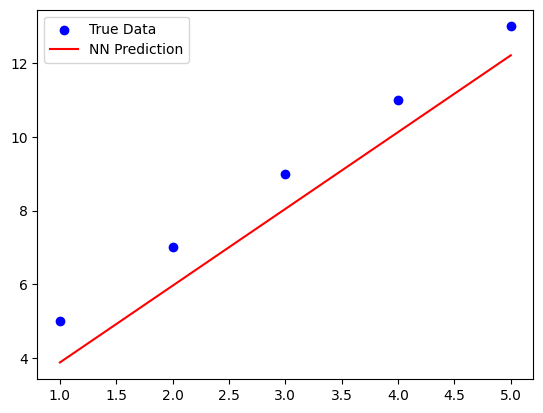

In [18]:
y_pred = model.predict(x)

plt.scatter(x.flatten(), y.flatten(), label="True Data", color="blue")
plt.plot(x.flatten(), y_pred.flatten(), label="NN Prediction", color="red")
plt.legend()
plt.show()


In [17]:
weights, bias = model.layers[0].get_weights()
print(f"Learned equation: y = {weights[0][0]:.2f}*x + {bias[0]:.2f}")


Learned equation: y = -0.69*x + 0.00
